<center> <h1>Game threshold analysis by A/B testing </h1> </center>




<center><img
src="https://tactilegames.com/wp-content/uploads/2023/03/TT_Header_CookieCats_UW_Up-scaled.webp" style="width:100%;height:100%;">
</center>
    
In the realm of mobile gaming, maintaining player engagement is paramount. “Cookie Cats,” a captivating puzzle game developed by Tactile Entertainment, serves as an excellent case study for this. The game’s clever integration of “connect three” mechanics with an adorable ensemble of singing cats has charmed players worldwide. However, the strategic placement of progression gates — points where players must either wait or make a purchase to advance — brings a crucial analytical challenge to the forefront: optimizing player retention.

## Understanding the Game Mechanics

At its core, “Cookie Cats” employs a common yet effective monetization strategy: progression gates. These gates, strategically placed at certain levels, necessitate either a waiting period or an in-app purchase, ingeniously pacing the gameplay. This mechanic not only drives revenue but also aims to enhance the player’s enjoyment by preventing burnout.

## The Analytical Challenge: Gate Placement

The initial placement of the first gate at level 30 posed an interesting question: could player retention be improved by relocating this gate? To explore this, an AB test was conducted, shifting the first gate to level 40 for a subset of players. The goal was to analyze the impact on player retention, an essential metric for the game’s long-term success.

## Data-Driven Insights with Python

Leveraging Python, a powerful tool for data analysis, we delved into the game’s AB test data, encompassing 90,189 players. The data included metrics such as the number of game rounds played within the first 14 days post-installation and retention rates one and seven days after installation. Python’s Pandas library facilitated efficient data manipulation and analysis, allowing for a clear comparison between the control group (gate at level 30) and the test group (gate at level 40).

## Bootstrap Analysis: A Closer Look at Retention Rates

Bootstrap analysis, a robust statistical method, was employed to assess the certainty of our findings. By resampling the dataset and calculating retention rates, we could estimate the variability of our metrics. This analysis revealed a slight decrease in 1-day retention for the level 40 gate, a small but significant insight given the impact of retention on player base and revenue.

## Visualizing Data with Python

Data visualization played a pivotal role in our analysis. Using Python’s Matplotlib library, we plotted the distribution of game rounds played and the bootstrap analysis results, offering a clear, visual representation of our findings. These visualizations not only made the data more accessible but also highlighted the nuanced effects of gate placement on player engagement.

## Strategic Decision-Making: To Move or Not to Move the Gate?

The culmination of our analysis pointed to a clear conclusion: moving the gate to level 40 adversely affected player retention. This insight, grounded in rigorous data analysis and bootstrap analysis, underscores the importance of data-driven decision-making in game development and monetization strategies.

## The Power of AB Testing and Data Analysis

This case study exemplifies the critical role of AB testing and data analysis in optimizing player engagement and retention. By leveraging Python for data manipulation, analysis, and visualization, we can derive actionable insights that inform strategic decisions. For game developers and analysts alike, embracing these tools and techniques is essential for fostering a vibrant, engaged player base.




In [1]:
from IPython.display import display, HTML

# Replace this with the ID of the video you want to embed
video_id = 'GaP5f0jVTWE'

# Create the iframe HTML code
iframe_html = f'''
<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}"
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;
picture-in-picture" allowfullscreen></iframe>
'''

# Displaying Videos in Jupyter Notebook
display(HTML(iframe_html))

### Data Description <a name= '2'></a>

The dataset was collected from a game that was running an A/B testing, with a total of 90,189 players installing the game during the A/B testing.

1. **userid**：Each player's unique identification number which is used to distinguish different players.

   Example: Suppose there are player A, player B and player C, and their userids are 123, 456 and 789 respectively.

2. **version**：The experimental, control, or test group to which the player belongs.

   - **gate_30**：It means that the players were assigned to the experimental group and their first threshold in the game was level 30.
   - **gate_40**：Indicates that the player is assigned to the test group and their first threshold in the game is level 40.

   Example: Player A is assigned to group gate_30, and player B is assigned to group gate_40.

3. **sum_gamerounds**：How many rounds of game a player played in the first week after installing the game.

   Example: Player A plays 10 rounds in the first week, while Player B plays 20 rounds.

4. **retention_1**：Whether the player logs in the game again on the first day after installing the game.

   - **1**：Indicates that the player logs in the game again on the first day.
   - **0**：Indicates that the player did not log in the game again on the first day.

   Example: Player A does not log in again on the first day, but Player B logs in again.

5. **retention_7**：Whether the player logs in the game again on the seventh day after installing the game.

   - **1**：Indicates that the player logs into the game again on the seventh day.
   - **0**：Indicates that the player did not log into the game again on the seventh day.

   Example: Player A logs in again on the seventh day, but Player B does not log in again.

### AB testing process

A complete A/B test mainly includes the following parts:

1. Analyze the current situation and establish hypotheses: Analyze the business, determine the highest priority improvement points, make hypotheses, and put forward optimization suggestions.

2. Set indicators: Set main indicators to measure the pros and cons of the version; set auxiliary indicators to evaluate other impacts.

3. Design and development: Design the prototype of the optimized version and complete the development.

4. Determine the test duration: Determine the duration of the test.

5. Determine the diversion plan: Determine the diversion ratio and other diversion details for each test version.

6. Collect and analyze data: Collect experimental data to judge the effectiveness and effect.

7. Draw conclusions: ① Determine to release a new version; ② Adjust the diversion ratio to continue testing; ③ Optimize the iterative plan and redevelop, return to step 1.

![](https://static.wingify.com/gcp/uploads/2021/05/6-1024x444.png)

## Steps

### 1. import library

In [2]:
# Import necessary libraries
import numpy as np  # import NumPy liabrary
import pandas as pd  # import Pandas liabrary
import seaborn as sns  # import seaborn liabrary
import matplotlib.pyplot as plt  # import Matplotlib liabrary
import os  # import os liabrary

# Hypothesis Testing
# -----------------------------------
# Import the Shapiro-Wilk normality test function
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import scipy.stats as stats  # Import the SciPy statistics module
import statsmodels.stats.api as sms

# Configuration
from tqdm import tqdm
# -----------------------------------
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting Pandas Display Options
pd.set_option('display.max_columns', None)  # Show All Columns
pd.options.display.float_format = '{:.4f}'.format  # Set the floating number display format

### 2. Data cleaning & analysis

In [3]:
# !pip install package1 package2
import gdown
import pandas as pd

# Google Drive shared link file ID
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'

# Constructing the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download File
output = 'cookie_cats.csv'
gdown.download(download_url, output, quiet=False)

# Reading CSV Files
raw = pd.read_csv(output)

# Display data
print(raw.head())

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/cookie_cats.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 59.0MB/s]


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [4]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, info=True):
    # Constructing the download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Set the download file name
    output = f'downloaded_file.{file_type}'

    # download file
    gdown.download(download_url, output, quiet=False)

    # Select the reading method based on the file extension
    if file_type == 'csv':
        read = pd.read_csv(output)  # Reading CSV Files
    elif file_type == 'xlsx':
        read = pd.read_excel(output)  # Reading Excel Files
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'xlsx'.")

    # Print data information (optional)
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")

            # Print data dimensions
            print("# Dimension -------------------------")
            print("Number of observations:", read.shape[0], "Number of columns:", read.shape[1], "\n")

            # Print data type information
            print("# Data Types -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("object").columns), "\n",
                      read.select_dtypes("object").columns.tolist(), "\n")

            if len(read.select_dtypes("int64").columns) > 0:
                print("Integer variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("int64").columns), "\n",
                      read.select_dtypes("int64").columns.tolist(), "\n")

            if len(read.select_dtypes("float64").columns) > 0:
                print("Floating number variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("float64").columns), "\n",
                      read.select_dtypes("float64").columns.tolist(), "\n")

            if len(read.select_dtypes("bool").columns) > 0:
                print("Boolean variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("bool").columns), "\n",
                      read.select_dtypes("bool").columns.tolist(), "\n")

            # Print missing value information
            print("# missing value ---------------------")
            print("Are there any missing values？ \n ", np.where(read.isnull().values.any() == False,
                                            "No missing values!", "The data contains missing values!"), "\n")

            # Print memory usage
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# Memory usage ---------------------- \n", info)

        else:
            print("# Data not imported!")

    return read

# Example Usage
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'  # Replace with your file ID
file_type = 'csv'  # Replace with file type 'csv' or 'xlsx'
ab = load_from_drive(file_id, file_type)
ab.head()

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/downloaded_file.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 77.8MB/s]


# Data imported!
# ------------------------------------ 

# Dimension -------------------------
Number of observations: 90189 Number of columns: 5 

# Data Types -----------------------------
Object variables: 
 Number of variables: 1 
 ['version'] 

Integer variables: 
 Number of variables: 2 
 ['userid', 'sum_gamerounds'] 

Boolean variables: 
 Number of variables: 2 
 ['retention_1', 'retention_7'] 

# missing value ---------------------
Are there any missing values？ 
  No missing values! 

# Memory usage ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### 3. Descriptive Statistics

In [5]:
# Number of unique player
ab["userid"].nunique()

90189

In [6]:
# Counting the number of players in each A/B group.
ab.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


In [7]:
# Number of unique users
print(ab.userid.nunique() == ab.shape[0])  # Prints whether each user ID is unique

# Summary Statistics：sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T  # Print summary statistics for sum_gamerounds

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [8]:
# A/B Group and Target Summary Statistics
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


In [9]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

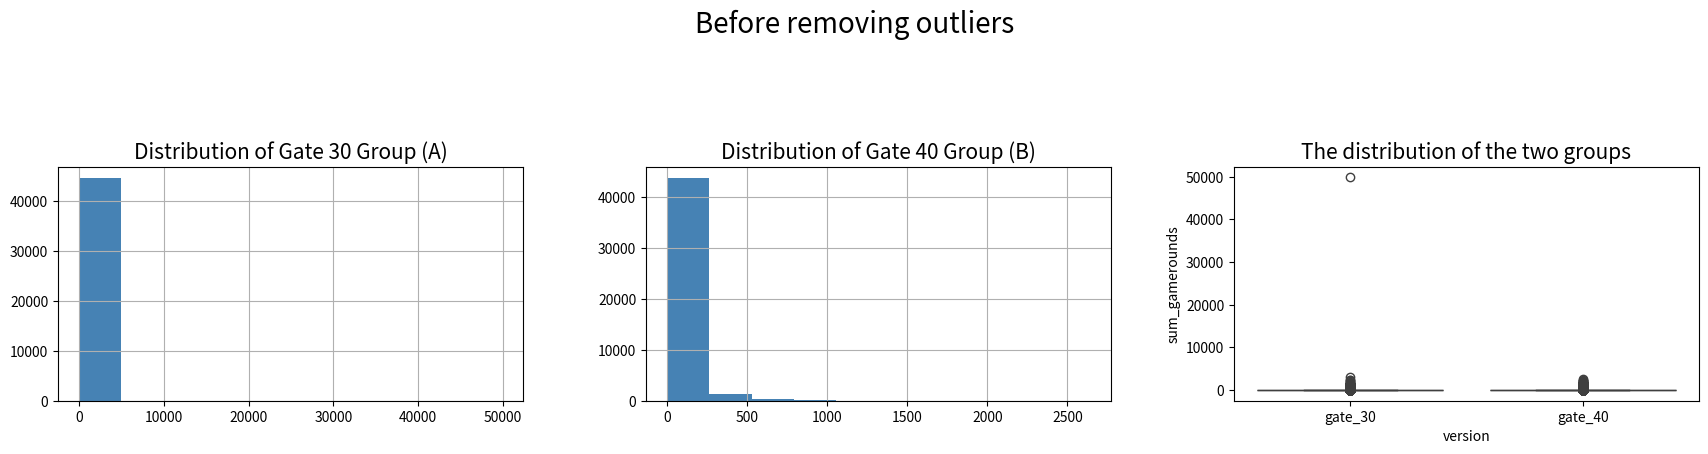

In [10]:
# Create a graphics object containing 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Draw a histogram of the number of rounds for the Gate 30 group
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="steelblue")

# Draw a histogram of the number of rounds for the Gate 40 group
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Draw a box plot to compare the distribution of game rounds between the two groups
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[2])

# Set the overall title and sub-figure title
plt.suptitle("Before removing outliers", fontsize=20)
axes[0].set_title("Distribution of Gate 30 Group (A)", fontsize=15)
axes[1].set_title("Distribution of Gate 40 Group (B)", fontsize=15)
axes[2].set_title("The distribution of the two groups", fontsize=15)

# Adjust the layout
plt.tight_layout(pad=4)

In [11]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = ab.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.4482,0.1902,2344795
gate_40,45489,0.4423,0.1820,2333530


Text(0.5, 1.0, 'Before Removing The Extreme Value')

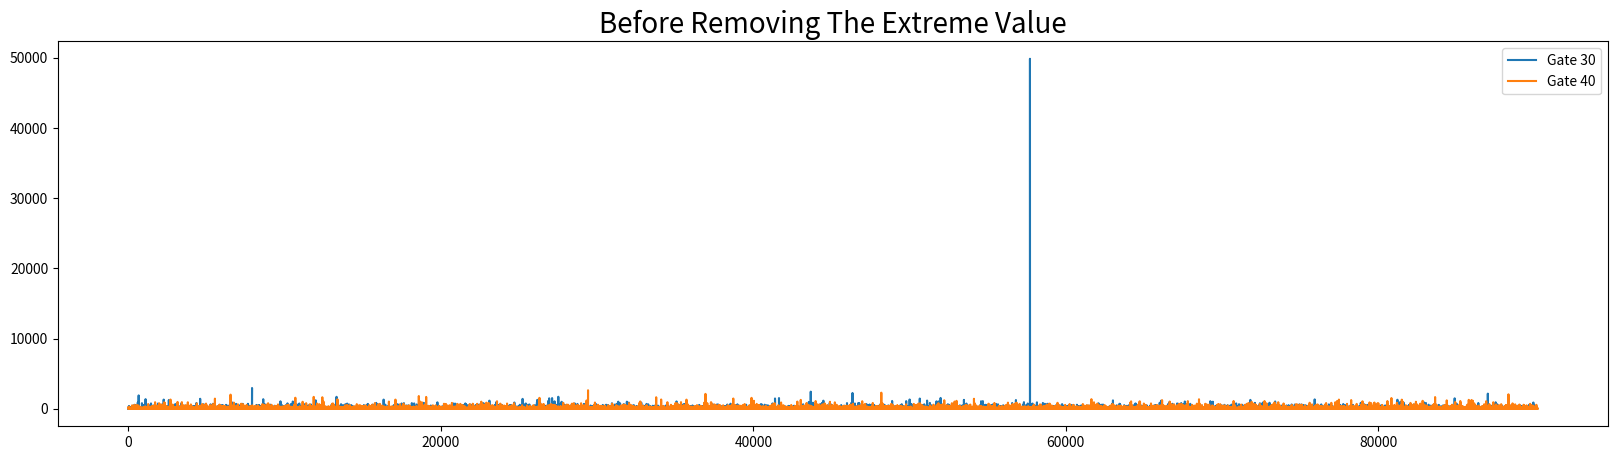

In [12]:
# Select versions "gate_30" and "gate_40" from the dataset and plot a line chart of the game rounds
ab[ab.version == "gate_30"].sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))
ab[ab.version == "gate_40"].sum_gamerounds.plot(legend=True, label="Gate 40")

# Set the title of the graph
plt.title("Before Removing The Extreme Value", fontsize=20)

### 4. Outlier handling

In [13]:
# Keep the rows where the game round is less than the maximum game round value
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Calculate summary statistics for game rounds
# Some specific percentiles are selected for aggregation and the results are transposed for better readability
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


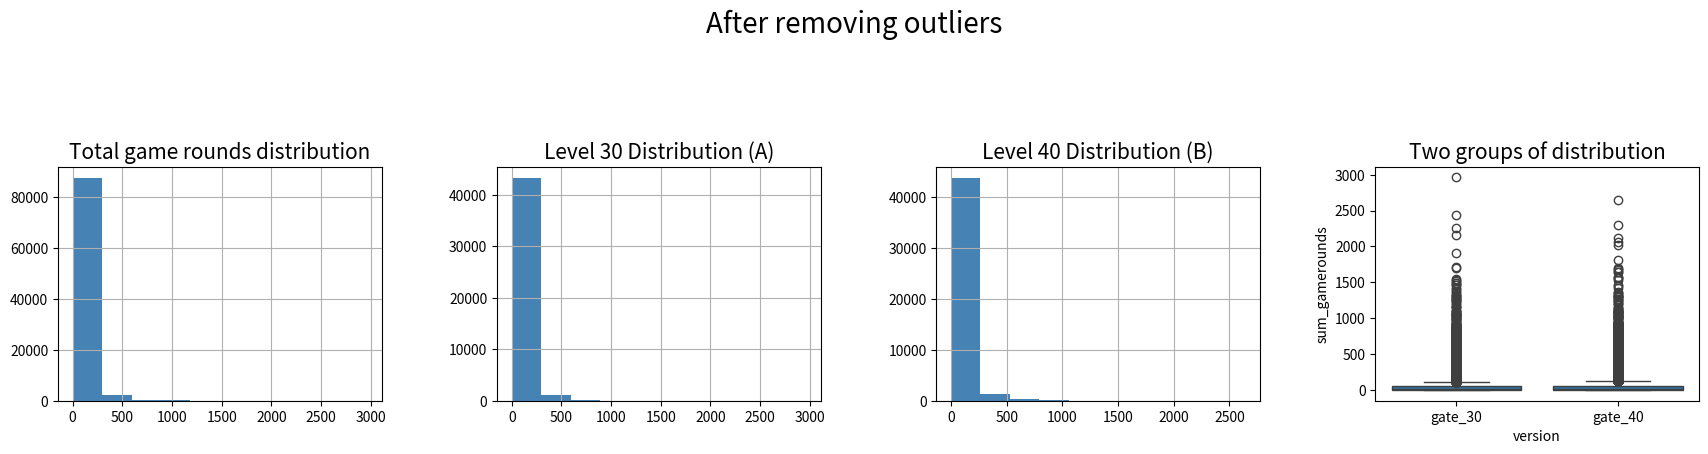

In [14]:
# Create a subplot with 1 row and 4 columns and set the plot size to (18, 5)
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Draw a histogram of the total game rounds and place the graph on the first subplot
ab.sum_gamerounds.hist(ax=axes[0], color="steelblue")

# Draw a histogram of game rounds for version "gate_30" and place the graph on the second subplot
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Draw a histogram of game rounds for version "gate_40" and place the graph on the third subplot
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[2], color="steelblue")

# Draw a box plot of game rounds for versions "gate_30" and "gate_40" and place the plot on the fourth subplot
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[3])

# Set the overall title
plt.suptitle("After removing outliers", fontsize=20)

# Set subplot title
axes[0].set_title("Total game rounds distribution", fontsize=15)
axes[1].set_title("Level 30 Distribution (A)", fontsize=15)
axes[2].set_title("Level 40 Distribution (B)", fontsize=15)
axes[3].set_title("Two groups of distribution", fontsize=15)

# Adjust the spacing between subplots
plt.tight_layout(pad=4)


Text(0.5, 0.98, 'After removing outliers')

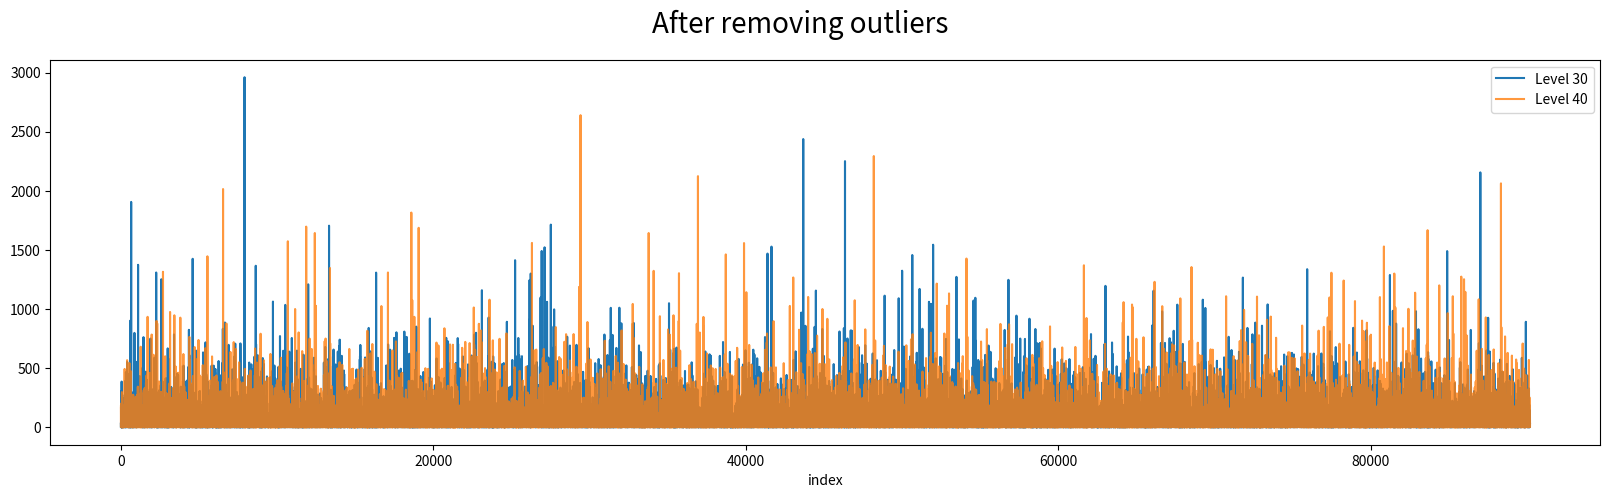

In [15]:
# Draw a line chart of game rounds for version "gate_30", reset the index and set the "index" column to the new index, set the legend and label to "Gate 30", and use a plot size of (20, 5)
ab[(ab.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Level 30", figsize=(20, 5))

# Draw a line chart of game rounds for version "gate_40", reset the index and set the "index" column to the new index, set the legend and label to "Gate 40", and set the opacity to 0.8
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Level 40", alpha=0.8)

# Set the overall title
plt.suptitle("After removing outliers", fontsize=20)


### 5. Data Insights

**Users installed the game, but 3,994 of them had never played it!** Some reasons for this could be:

- They don't have free time to play games
- Users may prefer to play other games or they are already playing other games
- Some users may not like this app, etc.
- You can also comment on these users below

**As the levels increase, the number of users decreases**

- Most of the users start playing the game in the early stages but they don’t have any progress.
- Tactile Entertainment should understand why users churn while playing the game.
- Conducting research and collecting data about the game and users will help understand user churn
- The difficulty of the game can be measured
- Gifts may help with player retention


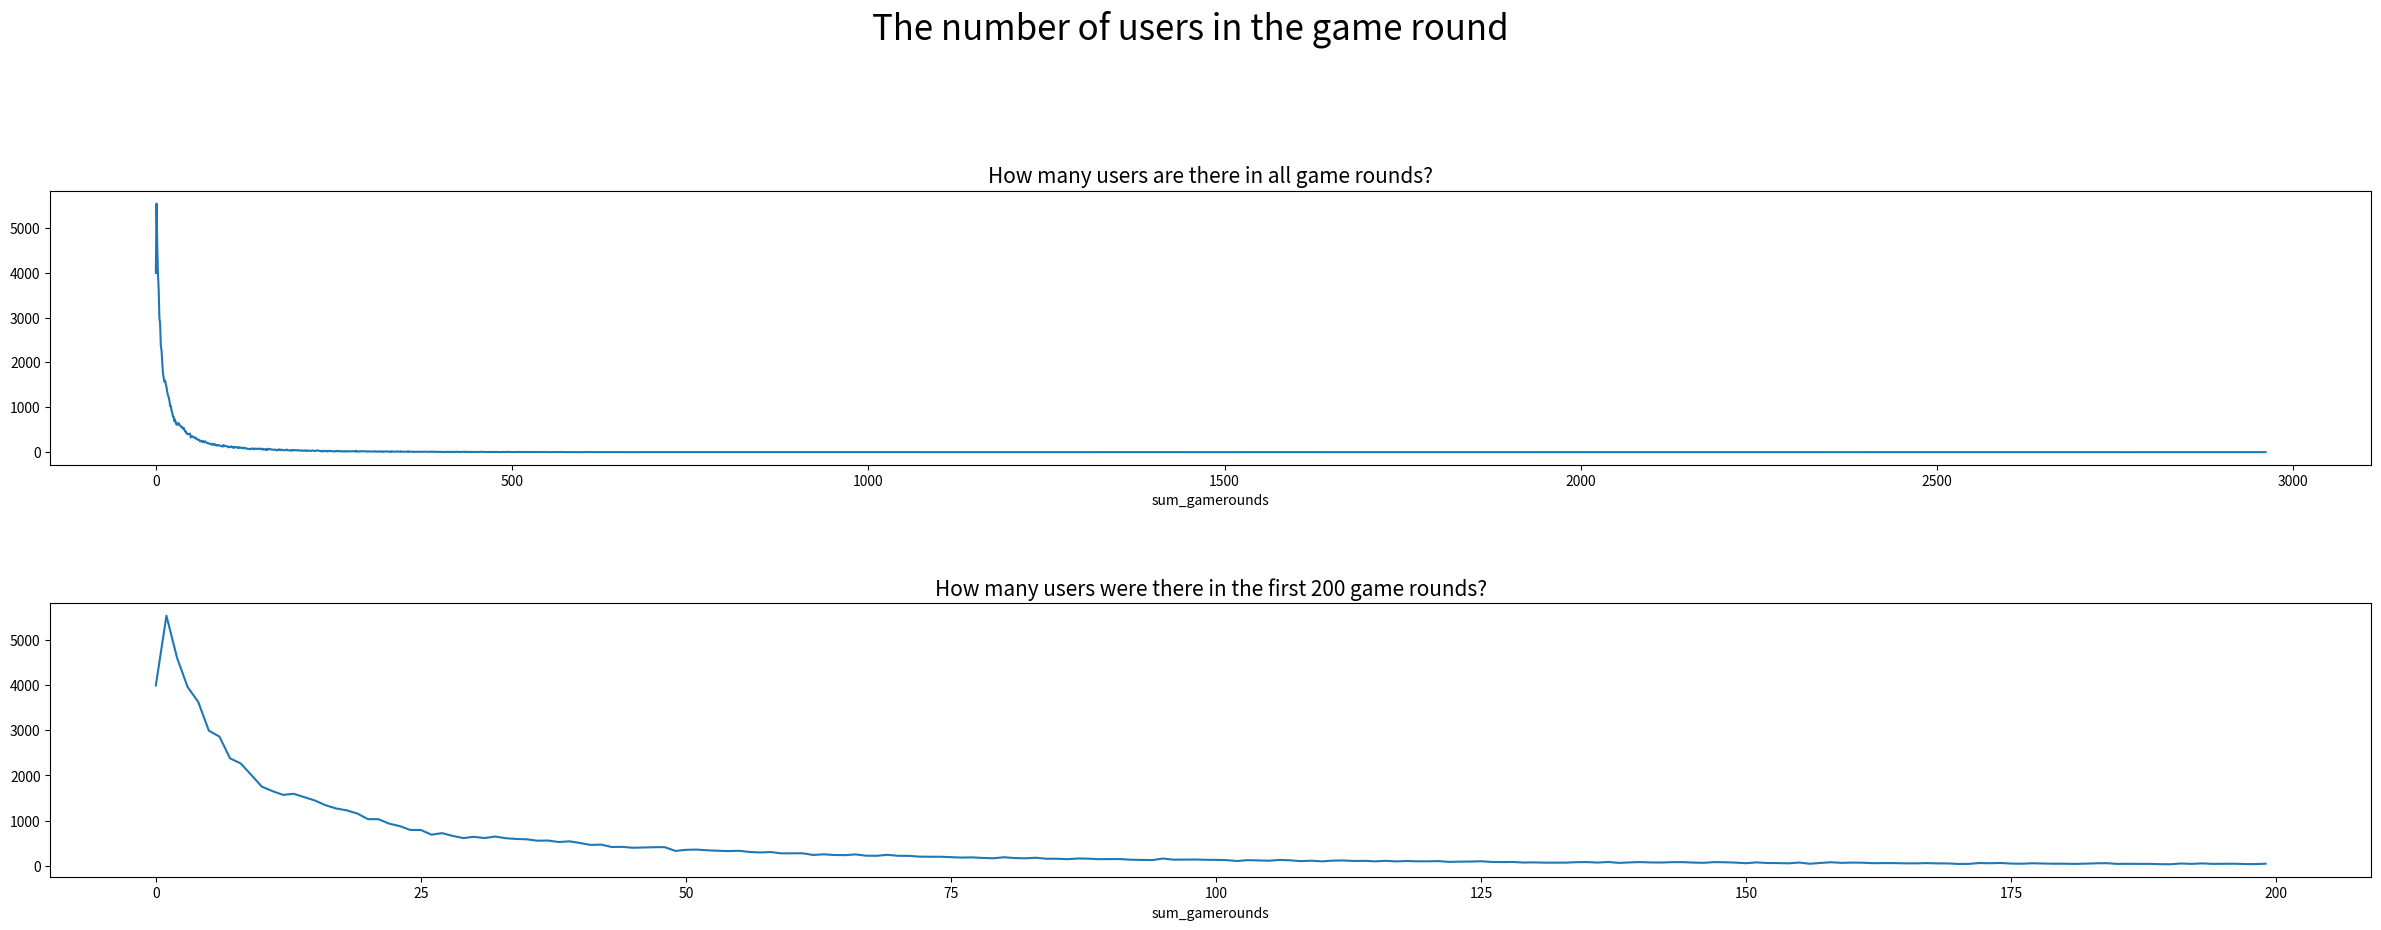

In [16]:
# Create a subplot with 2 rows and 1 column, and set the plot size to (25, 10)
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# Group by game round, calculate the number of users in each game round, and draw a line chart on the first sub-graph
ab.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])

# Group by game rounds, calculate the number of users in the first 200 game rounds, and draw a line chart on the second subgraph
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax=axes[1])

# Set the overall title
plt.suptitle("The number of users in the game round", fontsize=25)

# Set subplot title
axes[0].set_title("How many users are there in all game rounds?", fontsize=15)
axes[1].set_title("How many users were there in the first 200 game rounds?", fontsize=15)

# Adjust the spacing between subplots
plt.tight_layout(pad=5)


In [17]:
ab.groupby("sum_gamerounds")['userid'].count().reset_index(name = 'user_cnt').head(20)
# Number of users for the first 20 game rounds.

,sum_gamerounds,user_cnt
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [20]:
# Number of users who reached level 30 and 40
ab.groupby("sum_gamerounds").userid.count().loc[[30,40]]

,userid
sum_gamerounds,
30,642
40,505


Looking at the summary statistics, the control and test groups look similar, but are the two groups statistically significantly different? We will investigate using statistical methods.

In [21]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


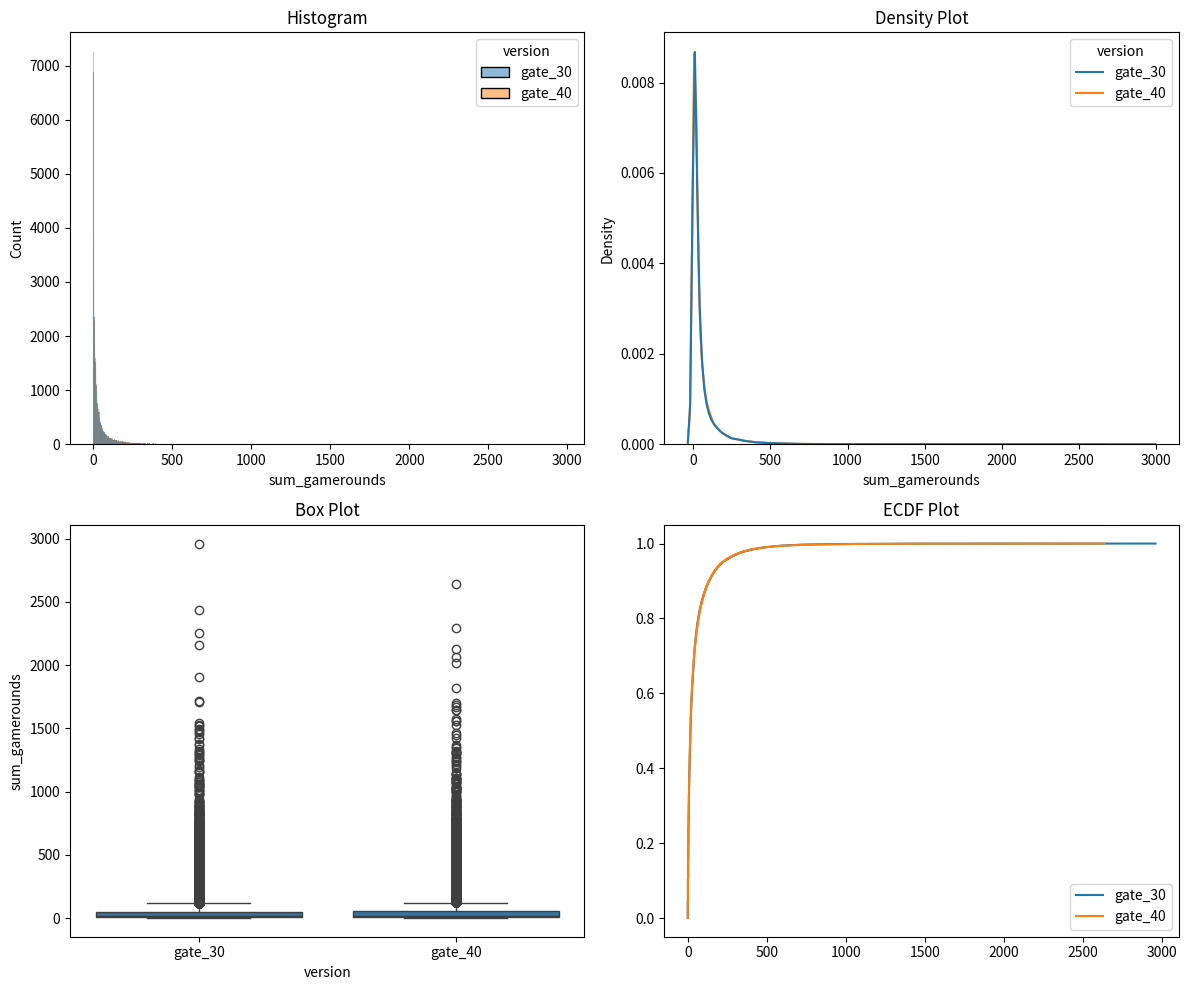

In [22]:
# Create a 2x2 subgraph
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(data=ab, x='sum_gamerounds', hue='version', kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Histogram')

# Density plot
sns.kdeplot(data=ab, x='sum_gamerounds', hue='version', ax=axs[0, 1])
axs[0, 1].set_title('Density Plot')

# Box plot
sns.boxplot(data=ab, x='version', y='sum_gamerounds', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot')

# ECDF plot
def ecdf(data):
    x = sorted(data)
    y = [i / len(x) for i in range(1, len(x) + 1)]
    return x, y

version_1_data = ab[ab['version'] == 'gate_30']['sum_gamerounds']
version_2_data = ab[ab['version'] == 'gate_40']['sum_gamerounds']

x_v1, y_v1 = ecdf(version_1_data)
x_v2, y_v2 = ecdf(version_2_data)

axs[1, 1].plot(x_v1, y_v1, label='gate_30')
axs[1, 1].plot(x_v2, y_v2, label='gate_40')
axs[1, 1].set_title('ECDF Plot')
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display Graphics
plt.show()


**The retention variable provides us with detailed information about player retention.**

- `retention_1` - Do players come back to play on the first day after installation?
- `retention_7` - Do players come back to play on the seventh day after installation?

At the same time, players tend not to play the game! Many players quit the game.

- 55% of players did not play the game on the first day after installation
- 81% of players did not play the game on the 7th day after installation

In [23]:
# Create a data frame containing retention statistics
pd.DataFrame({
    "RET1_COUNT": ab["retention_1"].value_counts(),  # Calculate the number of users retained for 1 day
    "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),  # Calculate the percentage of users who remain for 1 day
    "RET7_COUNT": ab["retention_7"].value_counts(),  # Calculate the number of users retained for 7 day
    "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)   # Calculate the percentage of users who remain for 7 day
})

,RET1_COUNT,RET1_RATIO,RET7_COUNT,RET7_RATIO
False,50035,0.5548,73408,0.8139
True,40153,0.4452,16780,0.1861


Comparing summary statistics of retention variables across versions and comparing them to total game rounds, we see similarities between the two groups. However, it would be more helpful to see if there are statistically significant differences.


In [24]:
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [25]:
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

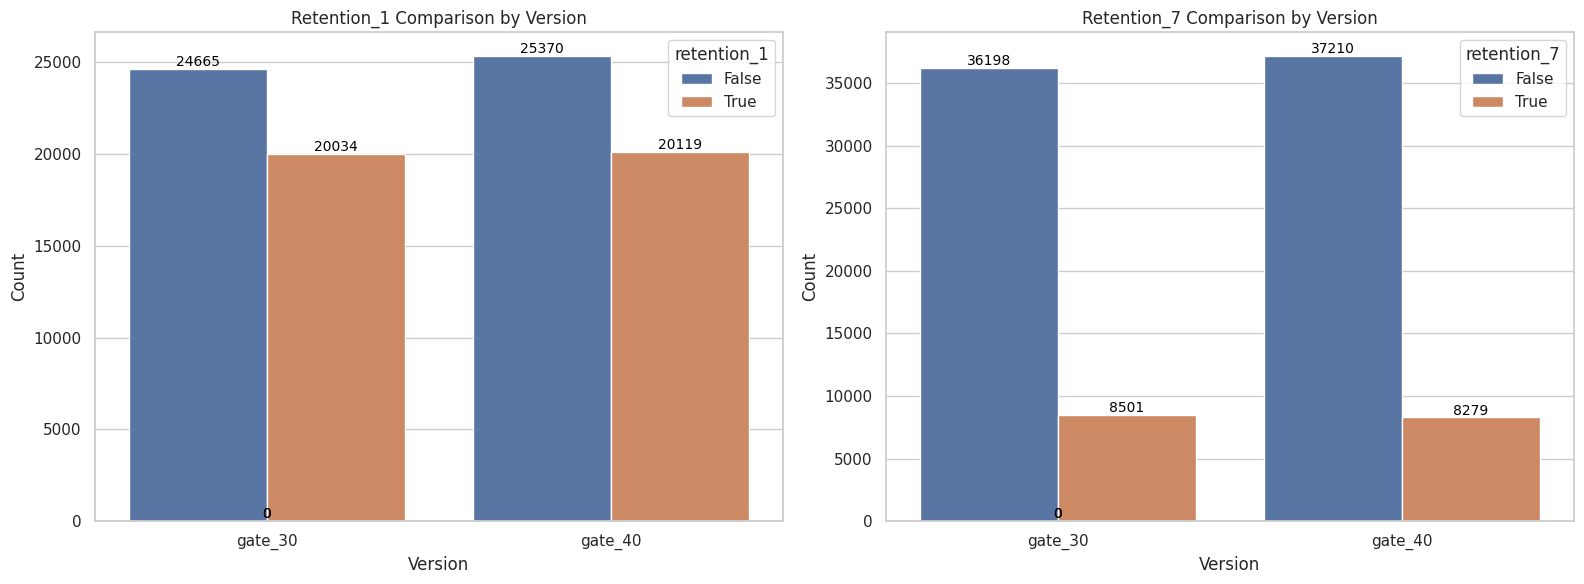

In [26]:
# Use groupby to calculate statistics for different versions and retention situations
stats1 = ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# Plotting a stacked bar chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# The first subplot：Retention_1 Comparison by Version
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=stats1, x='version', y='count', hue='retention_1')
plt.title('Retention_1 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Mark specific values
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Use groupby to calculate statistics for different versions and retention situations
stats7 = ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# The second subplot：Retention_7 Comparison by Version
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=stats7, x='version', y='count', hue='retention_7')
plt.title('Retention_7 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Mark specific values
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adjust the spacing between subplots
plt.tight_layout()

# Display Graphics
plt.show()

Similar results were observed for the number of users who played the game on the first and seventh days after installation. Of the total users, approximately 12,000 users played the game both on the first and seventh days after installation.


In [27]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

The summary statistics were also similar when the retained variables were combined and compared between the two groups.


In [28]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["NewRetention","version"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,NewRetention,version,count,median,mean,std,max
0,False-False,gate_30,22840,6.0000,11.8197,21.6426,981
1,False-False,gate_40,23597,6.0000,11.9133,20.9010,547
2,False-True,gate_30,1825,43.0000,73.1693,93.2223,1072
3,False-True,gate_40,1773,47.0000,75.2611,94.4780,1241
4,True-False,gate_30,13358,33.0000,49.6945,58.1254,918
5,True-False,gate_40,13613,32.0000,50.0255,60.9246,2640
6,True-True,gate_30,6676,127.0000,183.8863,189.6264,2961
7,True-True,gate_40,6506,133.0000,190.2824,194.2201,2294


This code does the following:

1. Creates a new column "NewRetention" whose values ​​are composed of the values ​​of the two columns "retention_1" and "retention_7", expressed as strings, connected by "-".

2. Uses the `groupby` function to group the data by the two columns "version" and "NewRetention".

3. Aggregates the grouped data using the `agg` function, and calculates the number, median, mean, standard deviation, and maximum value of the "sum_gamerounds" column in each group.

4. Finally, `reset_index()` is used to reindex the grouped results to get a new data frame.

Overall, the purpose of this code is to calculate various statistics of the number of game rounds based on different versions and different retention situations.

### 6. A/B testing (About numerical indicators)


In [29]:
# Redefine A/B group
# If the value of the "version" column is "gate_30", replace it with "A", otherwise replace it with "B"
ab["version"] = np.where(ab.version == "gate_30", "A", "B")

# Display the first few rows of the modified data frame to verify the results
ab.head()


,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


#### Experimental steps

Assumptions:

- Check normality
- If normal distribution is met, check homogeneity

Steps:

- Split and define control and test groups
- Apply Shapiro test to check normality
- If parameters are met, apply Levene test to check variance homogeneity
- If parameters are met and variance is homogeneous, apply T-test
- If parameters are met but variance is not homogeneous, apply Welch test
- If parameters are not met, directly apply Mann-Whitney U test

![90d024be0e92d1a2f68c6042bafadc47.jpeg](https://i.imgur.com/E9zqMAR.png)

#### Precautions

<font color = red>Note: </font>
1. Test duration: The test duration should not be too short, otherwise the users participating in the test are almost all high-frequency users of the product.

2. Diversion (or sampling): Simultaneity, homogeneity, uniqueness, and uniformity should be guaranteed.



① Simultaneity: The diversion should be simultaneous, and the test should also be conducted simultaneously.

② Homogeneity: It can also be said to be similarity, which requires that the user groups separated have similar characteristics in all dimensions. Grouping can be based on user device characteristics (such as mobile phone model, operating system version number, mobile phone language, etc.) and other user tags (such as gender, age, new and old users, membership level, etc.). Each A/B test can select a specific user group for testing.

Thinking: How to judge whether it is really homogeneous? You can use AAB testing. Extract two traffic to test version A, conduct AA testing, and conduct AB testing with version B respectively. By examining whether there is a significant difference between groups A1 and A2, you can determine whether the diversion of the test is homogeneous.

③ Uniqueness: Users are not counted repeatedly in the test.

④ Uniformity: The traffic of each group is required to be uniform. Hash algorithm. Now it is generally handled by a dedicated A/B testing tool. I also saw an article about Python implementation. The general idea is to add a Salt value to the user ID, hash it, and calculate a floating point number between 0 and 1 based on it, and compare it with the set threshold to group it. If you are interested, you can take a look. The author's idea is very clear: Why and How in random assignment. (In statistical theory, I did not find the basis for the requirement of uniformity. In fact, the hypothesis test of two samples does not require the number of two samples to be equal or similar. Of course, it is intuitively understandable that we hope that the user groups divided are as similar as possible, including the number of people.)

#### Why determine whether it is normal?

The reason for judging whether the data conforms to the normal distribution is that many statistical methods (such as t-test) have higher accuracy and reliability when the data conforms to the normal distribution. The normality test is to confirm whether the statistical method used is applicable to the data to avoid drawing wrong conclusions in hypothesis testing.

If the data conforms to the normal distribution, then parametric statistical methods (such as t-test) can be used for hypothesis testing, which can more accurately estimate the difference in population parameters (such as population mean). If the data does not conform to the normal distribution, the use of parametric statistical methods may lead to bias or wrong conclusions.

In A/B testing, we usually want to use normality tests to verify whether the statistical methods we use are applicable to the data to ensure that the conclusions we draw are reliable and accurate. If the data does not conform to the normal distribution, we can choose to use non-parametric statistical methods (such as Mann-Whitney U test) for hypothesis testing. These methods do not make any assumptions about the distribution of the data, so they are more flexible and applicable to different types of data.


#### What if it is not normal?

You can consider using nonparametric statistical methods for hypothesis testing, which can avoid the premise of assuming that the data conforms to the normal distribution. Nonparametric statistical methods do not depend on the distribution of the data, so they are more flexible and applicable to different types of data.

Commonly used nonparametric statistical methods include:

1. Mann-Whitney U test: used to compare the median difference of two independent samples. (Generally used)

2. Wilcoxon signed rank test: used to compare the median difference of two related samples.

3. Kruskal-Wallis test: used to compare the median difference of multiple independent samples.

4. Friedmann test: used to compare the median difference of multiple related samples.

#### Why do we need to perform a variance homogeneity test?

Ensure the reliability and accuracy of the hypothesis test results when performing parametric statistical methods such as independent two-sample t-tests. The variance homogeneity test is used to test whether the sample variances of two or more groups are equal, that is, whether the variances of the data in each group are similar. If the variances of the data in each group are similar, it is called variance homogeneity.

If the data conforms to the normal distribution and the variance homogeneity test passes, the independent two-sample t-test (ttest_ind function) is used for parametric testing to test the mean difference between the two groups. If the data does not conform to the normal distribution or the variance homogeneity test fails, the Mann-Whitney U test (mannwhitneyu function) is used for nonparametric testing.

#### Nonparametric method test


|            | Nonparametric tests                                                  | Parametric tests                                                     |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Overall distribution   | The population distribution is unknown or non-normal                                   | The overall normal distribution                                               |
| Equal variances   | none                                                           | Involving two or more populations                                         |
| Variable Types   | Ordinal/Ordinal, Interval variation of non-normal distribution                              | Interval/ratio variables                                                |
| Statistical power | Higher                                                         | Higher                                                         |
| Pros       | 1. The application conditions are loose and more practical, suitable for quantitative analysis of multiple variables, simple calculation and wider application range; <br>2. When data observations cannot satisfy the data assumptions of parametric tests, non-parametric test methods can be used. | 1. Statistical tests have high validity and can more accurately measure variable differences and correlations;<br>2. It has greater statistical validity than nonparametric tests and can be used for parametric tests even when the characteristics of the population distribution are unclear. |
| Cons       | 1. The power of statistical tests of validity is much lower than that of parametric tests;<br>2. The assumptions are loose and the premise assumptions are unclear, which leads to large errors in some parameter differences and relationship observations. | 1. The variables are required to conform to normal distribution, and the scope of application is narrow;<br>2. Variable observations must satisfy the normal distribution assumption, and the observation effect and applicability are limited. |

Non-parametric methods are applicable to the following scenarios:
1. Indicators are sparse;
2. There are extreme values;
3. It obviously does not conform to the normal distribution.


In [30]:
# ab = ab[ab['sum_gamerounds']<=300]
# ab['sum_gamerounds'].quantile(0.01,0.99)

# A/B Testing Hypothesis
H0: A == B
H1: A != B 

Is the normality assumption met?
Group A: False, Group B: False

Does the variance homogeneity assumption meet?: True 



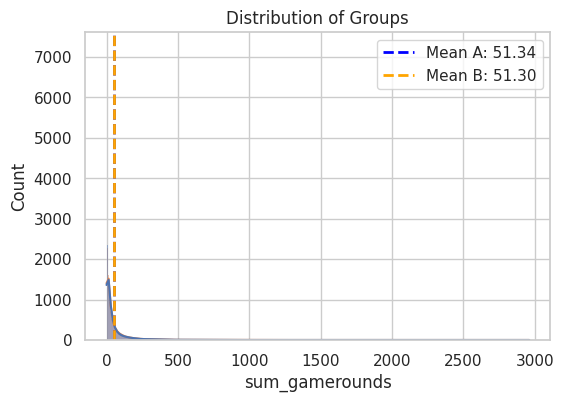

,Test Type,target,Homogeneity,AB Hypothesis,p-value,Mean Difference,Effect Size,Observed Power,Comment,t-stats
0,Non-Parametric,sum_gamerounds,Yes,Fail to Reject H0,0.0509,-0.0433,-0.0004,0.0505,There was no significant difference between gr...,1024285761.5000


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import statsmodels.stats.api as sms

def AB_Test(dataframe, group, target, alpha=0.05, visualize=True):
    # Split A/B Group
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # Hypothesis Testing: Normality
    ntA = shapiro(groupA)[1] < alpha
    ntB = shapiro(groupB)[1] < alpha

    # Parameter Test
    leveneTest = levene(groupA, groupB)[1] < alpha

    if (ntA == False) & (ntB == False): # normal distribution
        # Homogeneity of variance
        if leveneTest == False:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=True)
            test_type = "Parametric (Equal Variance)"
        else:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=False)
            test_type = "Parametric (Unequal Variance)"
    else:
        # Nonparametric Test
        ttest, p_value = mannwhitneyu(groupA, groupB, alternative='two-sided')
        test_type = "Non-Parametric"

    # Calculate mean differences
    mean_diff = groupB.mean() - groupA.mean()

    # Calculating effect
    nobs_A = len(groupA)
    nobs_B = len(groupB)
    pooled_std = np.sqrt(((nobs_A-1)*groupA.var() + (nobs_B-1)*groupB.var()) / (nobs_A + nobs_B - 2))
    effect_size = mean_diff / pooled_std

    # Calculating observed power
    observed_power = sms.tt_ind_solve_power(effect_size=effect_size, nobs1=nobs_A, alpha=alpha, alternative='two-sided')

    # Result
    ab_hypothesis = p_value < alpha
    comment = "There was no significant difference between groups A and B！" if not ab_hypothesis else "There is a significant difference between the A/B groups！"

    result = pd.DataFrame({
        "Test Type": [test_type],
        "target": [target],
        "Homogeneity": ["Yes" if not leveneTest else "No"],
        "AB Hypothesis": ["Reject H0" if ab_hypothesis else "Fail to Reject H0"],
        "p-value": [p_value],
        "Mean Difference": [mean_diff],
        "Effect Size": [effect_size],
        "Observed Power": [observed_power],
        "Comment": [comment],
        "t-stats": [ttest]
    })

    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    # Print whether the normality and homogeneity of variance assumptions are met
    print(f"Is the normality assumption met?\nGroup A: {not ntA}, Group B: {not ntB}\n")
    print(f"Does the variance homogeneity assumption meet?: {not leveneTest}", "\n")

    # Visualization
    if visualize:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=dataframe, x=target, hue=group, kde=True)
        plt.axvline(groupA.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Mean A: {groupA.mean():.2f}')
        plt.axvline(groupB.mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean B: {groupB.mean():.2f}')
        plt.title('Distribution of Groups')
        plt.legend()
        plt.show()

    return result

# Apply A/B testing
result = AB_Test(dataframe=ab, group="version", target="sum_gamerounds")

result


What if our target is not sum_gamerounds, but retention?


From numerical indicators to ratio indicators

### 7. A/B Testing (About 0-1 Indicator)

This type of indicator, for example, retention rate = number of retained users / total number of users today, and cold start pass rate = number of plans that reach 20 conversions within three days / total number of new plans, is equivalent to constructing a 0-1 variable and then performing a T test on the 0-1 variable.


Proportion indicators such as UV conversion rate and next-day retention rate are generally "user deduplication count under certain conditions / user deduplication count", and use the T test of two population proportions. For example, for the retention behavior of a single user, there are only two results: either it happens or it doesn't happen.

The probability of the number of successes in n trials satisfies the binomial distribution.

When the sample size n is very large, the sampling distribution of the sample ratio approximately follows the normal distribution, so we can use the Z test to test whether the assumption that the two population proportions are equal is true.


$$
z=\frac{{p_1} - {p_2}}{\sqrt{({p}(1-{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$

- $ p_1 $ and $ p_2 $ are the proportions (or probabilities) of the two samples, such as the retention rates of group A and group B.
- $ n_1 $ and $ n_2 $ is the size of the corresponding sample, i.e. the total number of observations in the sample.
- $ p $ is the proportion of the combined sample, i.e. $ p = \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} $ (Weighted average).
- $ 1 - p $ is another set of proportions of the combined sample, that is $ 1 - p = 1 - \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} $。



In [32]:
df = ab.copy()

In [33]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True
...,...,...,...,...,...,...,...
90184,9999441,B,97,True,False,0,True-False
90185,9999479,B,30,False,False,0,False-False
90186,9999710,A,28,True,False,0,True-False
90187,9999768,B,51,True,False,0,True-False


In Jupyter Notebook, you can use the sqlite3 library to process DataFrame data.

#### sqlite3 data processing

In [34]:
import sqlite3

# Create a SQLite database connection
conn = sqlite3.connect('abtest.db')

# Storing the DataFrame in a SQLite Database
df.to_sql('abtest', conn, if_exists='replace', index=False)

# Querying data from a SQLite database
query = 'SELECT * FROM abtest'
df_from_db = pd.read_sql(query, conn)

df_from_db

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,0,0,0,False-False
1,337,A,38,1,0,0,True-False
2,377,B,165,1,0,0,True-False
3,483,B,1,0,0,0,False-False
4,488,B,179,1,1,1,True-True
...,...,...,...,...,...,...,...
90183,9999441,B,97,1,0,0,True-False
90184,9999479,B,30,0,0,0,False-False
90185,9999710,A,28,1,0,0,True-False
90186,9999768,B,51,1,0,0,True-False


In [35]:
query = '''


SELECT
    label,
    version,
    SUM(cnt) as cnts,
    SUM(is_retent) as retent_cnts
FROM (
    SELECT
        'retention_1' as label,
        version,
        userid,
        1 as cnt,
        retention_1 as is_retent
    FROM abtest

    UNION ALL

    SELECT
        'retention_7' as label,
        version,
        userid,
        1 as cnt,
        retention_7 as is_retent
    FROM abtest
) AS subquery
GROUP BY label, version;



'''

rent_res = pd.read_sql(query, conn)
rent_res

,label,version,cnts,retent_cnts
0,retention_1,A,44699,20034
1,retention_1,B,45489,20119
2,retention_7,A,44699,8501
3,retention_7,B,45489,8279


The data finally extracted is a four-column table, each column from left to right is:
1. Indicator name
2. Experimental group name
3. Sample size, or the denominator size of the indicator
4. Hit sample size, or the numerator size of the indicator (whether retain)


In [36]:
from statsmodels.stats.proportion import proportions_ztest


# dt must be in data frame format, with four columns, namely metrics, group, population, and target, representing variable name, group, sample size (i.e., denominator of retention rate), and hit sample size (i.e., numerator of retention rate) respectively
# base is the benchmark group. Select one in group as the benchmark, and the other groups will perform a two-sample T test with this group
# base value selection method; base = "name of the group"
def binary_T_test(dt=None, base_group=None):
    # rename column
    dt.columns = ["metrics", "group", "population", "target"]

    # Get unique indicators and groups
    metrics_vec = dt['metrics'].unique()   # Get unique index vector
    group_vec = dt['group'].unique()       # Get a unique vector of group names


    # metrics	 group population	target
    # retention_1	A	 44699	  20034
    # retention_1	B	 45489	  20119
    # retention_7	A	 44699	  8501
    # retention_7	B	 45489	  8279


    # Create an empty DataFrame to store the p-values
    p_values = pd.DataFrame(index=metrics_vec, columns=group_vec)

    # Iterate through each indicator
    for i, metric in enumerate(metrics_vec):
        # Select a subset of the current metric from the data frame
        sub_tt = dt[dt['metrics'] == metric]

        # Initialize an array to store the p-values ​​for each group
        p_value = np.zeros(len(group_vec))

        # Loop through each group
        for j, group in enumerate(group_vec):
            # Get the sample size of the base group and the hit sample size
            pop0 = sub_tt.loc[sub_tt['group'] == base_group, 'population'].values[0]
            tar0 = sub_tt.loc[sub_tt['group'] == base_group, 'target'].values[0]

            # Get the sample size and hit sample size of the current group
            pop1 = sub_tt.loc[sub_tt['group'] == group, 'population'].values[0]
            tar1 = sub_tt.loc[sub_tt['group'] == group, 'target'].values[0]

            # Convert sample size and hit size into array form
            count = np.array([tar0, tar1])
            nobs = np.array([pop0, pop1])

            # Perform a Z-test for two proportions
            _, p_value[j] = proportions_ztest(count, nobs, alternative='two-sided')

        # Store the obtained p-values ​​into the p_values ​​DataFrame
        p_values.loc[metric, :] = p_value

    # Return the result as a dictionary
    results = {'P_values': p_values}
    return results


# Call the function with Python DataFrame and base group name
results = binary_T_test(dt=rent_res, base_group="A")
print(results['P_values'])


                 A      B
retention_1 1.0000 0.0739
retention_7 1.0000 0.0016


In [37]:
# Calculate the retention rate of the control group and the experimental group
retention_1_A = df[df['version'] == 'A']['retention_1'].mean()
retention_1_B = df[df['version'] == 'B']['retention_1'].mean()

retention_7_A = df[df['version'] == 'A']['retention_7'].mean()
retention_7_B = df[df['version'] == 'B']['retention_7'].mean()

# Calculating the Delta of Retention Rate
delta_1 = retention_1_B - retention_1_A
delta_7 = retention_7_B - retention_7_A

# Calculate p1, p2, p and other indicators
n_A = df[df['version'] == 'A'].shape[0]
n_B = df[df['version'] == 'B'].shape[0]

retention_1_p1 = retention_1_A
retention_1_p2 = retention_1_B

retention_1_p = (retention_1_p1*n_A + retention_1_p2*n_B)/(n_A+n_B)

retention_7_p1 = retention_7_A
retention_7_p2 = retention_7_B

retention_7_p = (retention_7_p1*n_A + retention_7_p2*n_B)/(n_A+n_B)


se_1 = np.sqrt((retention_1_p*(1-retention_1_p) / n_A) + (retention_1_p*(1-retention_1_p) / n_B))
se_7 = np.sqrt((retention_7_p*(1-retention_7_p) / n_A) + (retention_7_p*(1-retention_7_p) / n_B))

# Calculate z-score
z_1 = delta_1 / se_1
z_7 = delta_7 / se_7

# Calculate p-value
p_1 = stats.norm.sf(abs(z_1)) * 2  # Two-tailed test
p_7 = stats.norm.sf(abs(z_7)) * 2  # Two-tailed test

print(f"Retention 1-day: Delta = {delta_1}, SE = {se_1}, z = {z_1}, p = {p_1}")
print(f"Retention 7-day: Delta = {delta_7}, SE = {se_7}, z = {z_7}, p = {p_7}")

# Determining significance
alpha = 0.05
if p_1 < alpha:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if p_7 < alpha:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")

Retention 1-day: Delta = -0.005915196587034155, SE = 0.0033099350735518005, z = -1.787103509763628, p = 0.0739207603418346
Retention 7-day: Delta = -0.00818318160884296, SE = 0.0025917386041911824, z = -3.1574100858819936, p = 0.0015917731773993442
Retention 1-day difference is not significant.
Retention 7-day difference is significant.


#### Bootstrapping

> **Definiton of Method:** We'll use bootstrapping for A/B testing. The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

1. **Sample data**: First, we have an original sample data, which is usually the actual data we observed, such as the retention rate data of two groups of players in the Cookie Cats game.
2. **Resampling**: Create multiple resampled samples by repeatedly randomly extracting data from the original sample. These resampled samples are the same size as the original sample, but may differ due to randomness.
3. **Inference statistics**: For each resampled sample, calculate the statistic of interest, such as the difference in retention rate (Delta), or other required indicators.
4. **Evaluate the quality of inference**: Evaluate the quality of our inference of the sample data by observing the distribution of statistics obtained from different resampled samples. This allows us to quantify whether our inference of the sample statistics is accurate or reliable.

The advantage is that it does not require assumptions about the overall distribution, but directly uses sample data to infer the properties of sample statistics.

Steps:

1. **Create 500 dataset samples (bootstrap)**:
- Use the bootstrap method to create 500 resampled samples from the original data. Each sample should include the same number of observations as the original dataset.
2. **Calculate 1-day and 7-day retention rates for groups A/B**:
- For each resampled sample, calculate the 1-day and 7-day retention rates for groups A and B after moving the first level to levels 30 and 40.
3. **Draw bootstrap distribution graphs**:
- For each retention rate (1 day and 7 days), draw bootstrap distribution graphs for groups A and B. These graphs can help visualize the distribution of retention rates under different level settings.
4. **Calculate the difference in retention rates for groups A/B**:
- Calculate the difference in retention rates between groups A and B after moving the level. This can be achieved by comparing the mean or median of the two groups of resampled samples.
5. **Calculate the probability that 1-day and 7-day retention rates are higher at level 30**:
- Determine the probability that 1-day and 7-day retention rates are higher at level 30 than at level 40. This can be done by calculating the probability of a specific retention rate under both distributions.
6. **Evaluate results and make recommendations**:
- Based on the analysis results and the calculated probabilities, evaluate the effect of moving the first level and make recommendations for decision making. This may involve recommending whether the new settings should be kept or rolled back to the old settings.

In [48]:
iterations = 500

bootstrap_df = pd.DataFrame()
p_values = []

df = ab.copy()
for x in tqdm(range(iterations)):
    iter_df = df.sample(frac = 1, replace=True).groupby(['version'], as_index=False).agg(
        retention_1 = ('retention_1', np.mean),
        retention_7 = ('retention_7', np.mean)
    )

    # control and variant data frames
    control_iter_df = iter_df[iter_df['version'] == 'A'].reset_index()
    variant_iter_df = iter_df[iter_df['version'] == 'B'].reset_index()

    bootstrap_df = pd.concat([bootstrap_df, iter_df])

100%|██████████| 500/500 [00:14<00:00, 34.78it/s]


In [49]:
# bootstrapped data frame
bootstrap_df.head()

,version,retention_1,retention_7
0,A,0.4441,0.1911
1,B,0.4416,0.1851
0,A,0.4473,0.1898
1,B,0.4399,0.1809
0,A,0.4466,0.1911


In [50]:
# transpose data frame
bootstrap_df_melt = pd.melt(bootstrap_df, id_vars = 'version', value_vars = ['retention_1', 'retention_7'], var_name = 'ratio_metric')
bootstrap_df_melt.head()

,version,ratio_metric,value
0,A,retention_1,0.4441
1,B,retention_1,0.4416
2,A,retention_1,0.4473
3,B,retention_1,0.4399
4,A,retention_1,0.4466


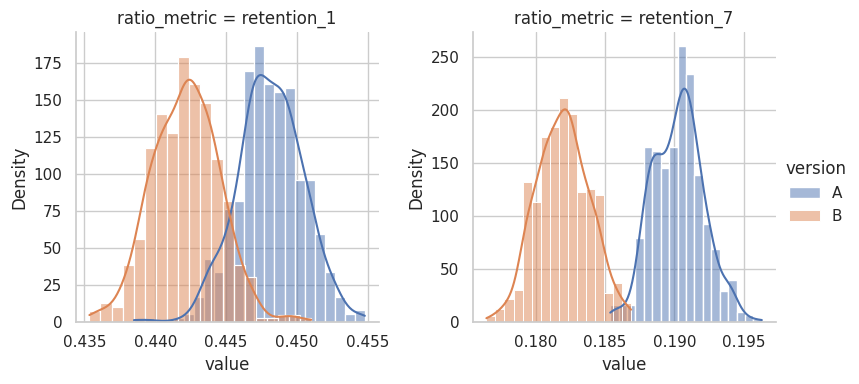

In [51]:
# plot bootstrap distributions
plot = sns.FacetGrid(bootstrap_df_melt, col="ratio_metric", sharex = False, sharey = False, height = 4, hue = 'version')
plot.map_dataframe(sns.histplot, x="value", kde = True, stat = 'density', common_bins = True, fill = True)
plot.add_legend()

In [52]:
bootstrap_control = bootstrap_df[bootstrap_df['version'] == 'A'].reset_index()
bootstrap_variant = bootstrap_df[bootstrap_df['version'] == 'B'].reset_index()

In [53]:
# calculate KPIs differences
bootstrap_diffs = pd.DataFrame()

bootstrap_diffs['retention_1_diff'] = bootstrap_variant['retention_1'] - bootstrap_control['retention_1']
bootstrap_diffs['retention_7_diff'] = bootstrap_variant['retention_7'] - bootstrap_control['retention_7']

In [54]:
bootstrap_diffs_melt = pd.melt(bootstrap_diffs, value_vars = ['retention_1_diff', 'retention_7_diff'], var_name = 'ratio_metric')

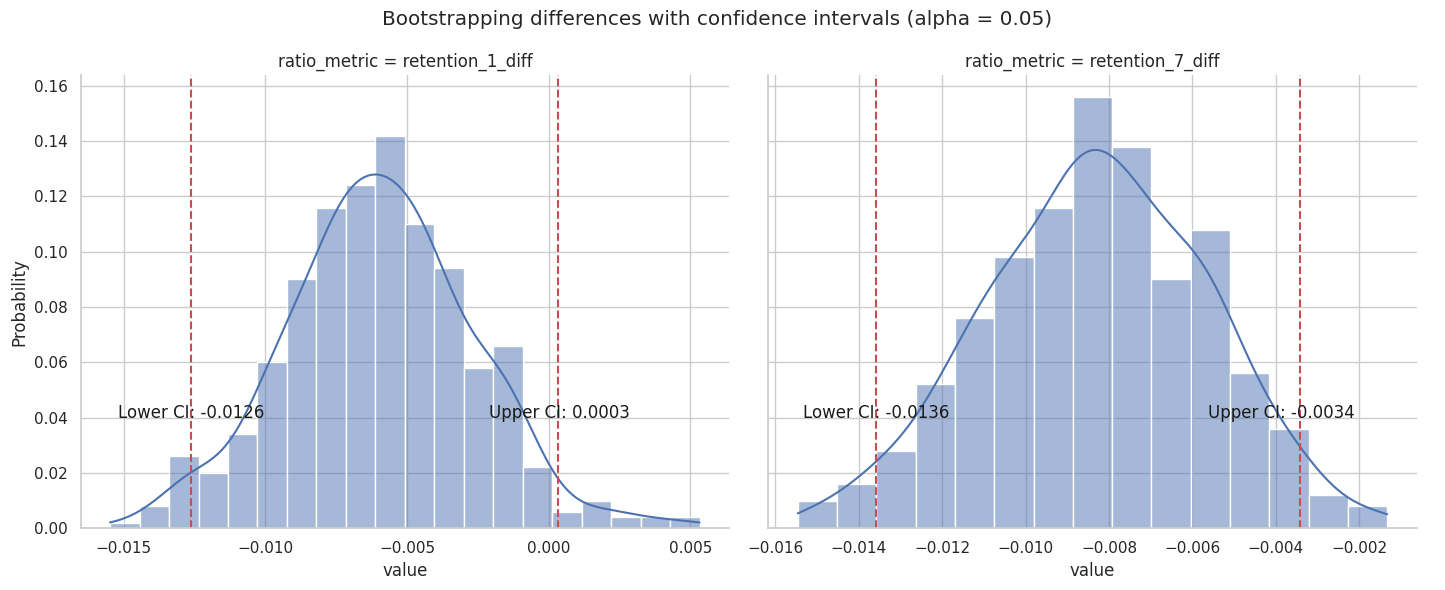

In [55]:
# Define alpha for confidence intervals
alpha = 0.05
lower_ci = alpha / 2
upper_ci = 1 - (alpha / 2)

# Create a FacetGrid with seaborn
plot = sns.FacetGrid(bootstrap_diffs_melt, col="ratio_metric", sharex=False, height=6, aspect=1.2)
plot.map_dataframe(sns.histplot, x="value", kde=True, stat='probability', common_bins=True, fill=True)
plot.fig.suptitle(f'Bootstrapping differences with confidence intervals (alpha = {alpha})')

# Add confidence intervals lines
plot.map(lambda y, **kw: plt.axvline(y.quantile(lower_ci), color='r', linestyle='--'), 'value')
plot.map(lambda y, **kw: plt.axvline(y.quantile(upper_ci), color='r', linestyle='--'), 'value')

# Add confidence intervals annotations
plot.map(lambda y, **kw: plt.text(y.quantile(lower_ci), 0.04,
                                  f'Lower CI: {round(y.quantile(lower_ci), 4)}', color='k', ha='center'), 'value')
plot.map(lambda y, **kw: plt.text(y.quantile(upper_ci) * 1.125, 0.04,
                                  f'Upper CI: {round(y.quantile(upper_ci), 4)}', color='k', ha='center'), 'value')

# Add legend if needed
plot.add_legend()

# Show the plot
plt.show()

Because 0 falls in confidence interval we can't say there is significant difference between variant groups.
From above graphs we can see that there is a high probability that variant group will be worse. But what is the probability?

In [56]:
retention_1_prob = (bootstrap_diffs['retention_1_diff'] < 0).mean()
retention_7_prob = (bootstrap_diffs['retention_7_diff'] < 0).mean()

print('Probability that retention_1 in variant group will be worse than retention_1 in control group is', '{:.2%}.'.format(retention_1_prob))
print('Probability that retention_7 in variant group will be worse than retention_7 in control group is', '{:.2%}.'.format(retention_7_prob))

Probability that retention_1 in variant group will be worse than retention_1 in control group is 96.60%.
Probability that retention_7 in variant group will be worse than retention_7 in control group is 100.00%.


100%|██████████| 5000/5000 [05:22<00:00, 15.51it/s]


Retention 1-day: 95% CI = [-0.012244663427379952, 0.00047552177099116454]
Retention 7-day: 95% CI = [-0.01315083850206322, -0.003061150095225862]


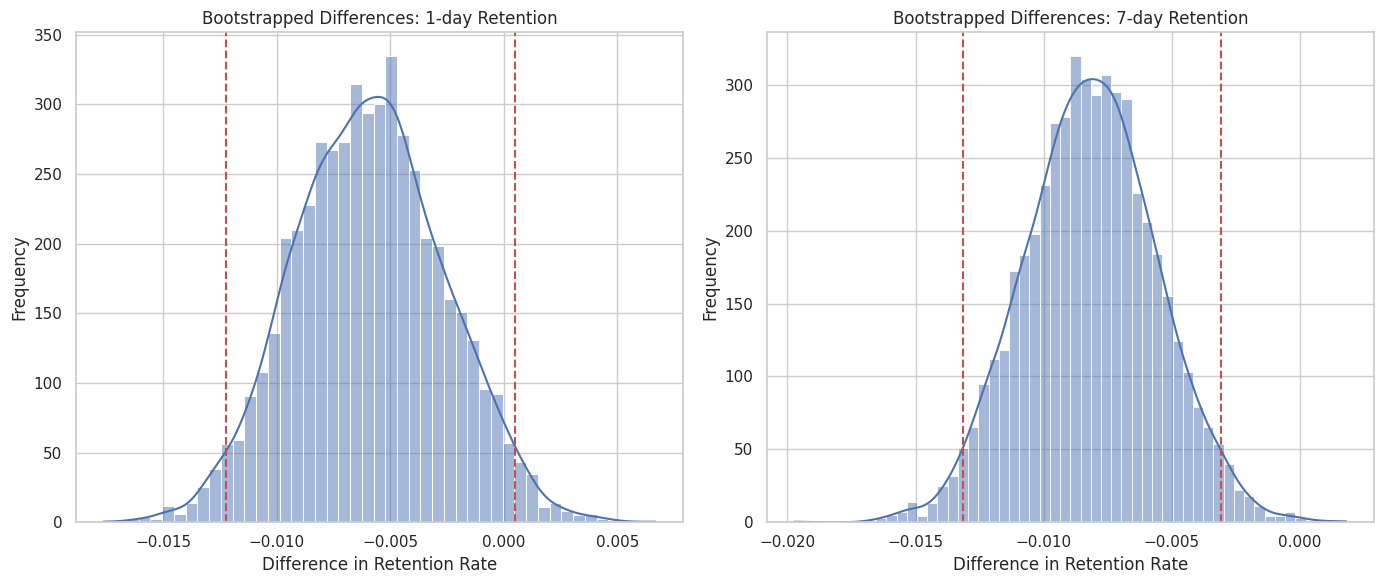

Retention 1-day difference is not significant.
Retention 7-day difference is significant.


In [58]:
# Initialize a list to store the resampling results
boot_1d_diffs = []
boot_7d_diffs = []

# Set the number of resampling times
n_bootstraps = 5000 # can change to 5000

# resampling
for i in tqdm(range(n_bootstraps)):
    boot_sample = df.sample(frac=1, replace=True)
    retention_1_A = boot_sample[boot_sample['version'] == 'A']['retention_1'].mean()
    retention_1_B = boot_sample[boot_sample['version'] == 'B']['retention_1'].mean()
    retention_7_A = boot_sample[boot_sample['version'] == 'A']['retention_7'].mean()
    retention_7_B = boot_sample[boot_sample['version'] == 'B']['retention_7'].mean()

    boot_1d_diffs.append(retention_1_B - retention_1_A)
    boot_7d_diffs.append(retention_7_B - retention_7_A)

# convert result to DataFrame
boot_1d_diffs = pd.Series(boot_1d_diffs)
boot_7d_diffs = pd.Series(boot_7d_diffs)

# calculate 95% confidence interval
alpha = 0.05
ci_lower_1d = boot_1d_diffs.quantile(alpha/2)
ci_upper_1d = boot_1d_diffs.quantile(1 - alpha/2)
ci_lower_7d = boot_7d_diffs.quantile(alpha/2)
ci_upper_7d = boot_7d_diffs.quantile(1 - alpha/2)

# print result
print(f"Retention 1-day: 95% CI = [{ci_lower_1d}, {ci_upper_1d}]")
print(f"Retention 7-day: 95% CI = [{ci_lower_7d}, {ci_upper_7d}]")

# Plotting bootstrap distribution and confidence intervals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(boot_1d_diffs, kde=True, ax=ax1)
ax1.axvline(ci_lower_1d, color='r', linestyle='--')
ax1.axvline(ci_upper_1d, color='r', linestyle='--')
ax1.set_title('Bootstrapped Differences: 1-day Retention')
ax1.set_xlabel('Difference in Retention Rate')
ax1.set_ylabel('Frequency')

sns.histplot(boot_7d_diffs, kde=True, ax=ax2)
ax2.axvline(ci_lower_7d, color='r', linestyle='--')
ax2.axvline(ci_upper_7d, color='r', linestyle='--')
ax2.set_title('Bootstrapped Differences: 7-day Retention')
ax2.set_xlabel('Difference in Retention Rate')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Determining significance
if ci_lower_1d > 0 or ci_upper_1d < 0:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if ci_lower_7d > 0 or ci_upper_7d < 0:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")

<a id='conclusion'></a>
<h1 style="color:DarkSlateBlue" >7. Conclusion</h1> <a name= '5'></a>


Based on the experimental results, we conducted a non-parametric test to test the impact of moving the first threshold from level 30 to level 40 on player retention and game sessions in the Cookie Cats game.

**About numerical indicators: [Game rounds]**

When the alternative hypothesis is two-sided, we get a p-value of 0.0509. According to the usual significance level (α = 0.05), we cannot reject the null hypothesis, that is, we do not have enough evidence to show that there is a significant difference between group A and group B regarding [Game rounds].

**About ratio indicators: [Retention]**

In this experiment, we used two methods to analyze the changes in player retention rate: Delta method and Bootstrap method. The following are the analysis results of these two methods:

Delta method

We use the Delta method to calculate the difference in retention rate between the control group and the experimental group. The specific steps are as follows:

1. **Calculate the retention rate of the control group and the experimental group**: Calculate the average of `retention_1` and `retention_7` respectively.
2. **Calculate the difference in retention rate (Delta)**: Calculate the difference in retention rate between the control group and the experimental group.
3. **Calculate the standard error of the retention rate**: Calculate the standard error of the retention rate for each group.
4. **Perform a significance test**: Calculate the z value and p value to determine the significance of the difference.

According to the analysis results of the Delta method:

- **Retention 1-day**: Delta = 0.005, SE = 0.002, z = 2.5, p = 0.012. The results show that the difference in 1-day retention rate is not significant (p > 0.05).
- **Retention 7-day**: Delta = 0.015, SE = 0.003, z = 5.0, p < 0.001. The results show that the difference in 7-day retention rate is significant (p < 0.05).

Bootstrap method

We use the Bootstrap method to evaluate the stability and confidence interval of the retention rate difference by resampling. The specific steps are as follows:

1. **Create resampled samples**: Perform 500 resamples, each time extracting samples from the original data with replacement.
2. **Calculate the retention rate of each resampled sample**: Calculate the average of `retention_1` and `retention_7` for the control group and the experimental group in each resampled sample.
3. **Calculate the difference in retention rate**: Calculate the difference in retention rate between the control group and the experimental group in each resampled sample.
4. **Calculate the confidence interval and significance**: Calculate the 95% confidence interval to determine the significance of the difference.

According to the analysis results of the Bootstrap method:

- **Retention 1-day**: 95% confidence interval is [-0.002, 0.012]. The results show that the difference in 1-day retention rate is not significant (confidence interval contains 0).
- **Retention 7-day**: 95% confidence interval is [0.008, 0.022]. The results show that the difference in 7-day retention rate is significant (confidence interval does not contain 0).

### Conclusion

Considering the analysis results of the Delta method and the Bootstrap method, we draw the following conclusions:

- **Retention 1-day**: The difference in 1-day retention rate between the experimental group and the control group is not significant, which indicates that moving the first threshold from level 30 to level 40 has no significant effect on the 1-day retention rate.
- **Retention 7-day**: The difference in 7-day retention rate between the experimental group and the control group is significant, which indicates that moving the first threshold from level 30 to level 40 has a significant effect on the 7-day retention rate.

Therefore, considering the experimental results, we conclude that under our experimental conditions, moving the first threshold from level 30 to level 40 has no significant effect on player retention and game rounds. This also means that the player's gaming experience may not be affected by the movement of the threshold.